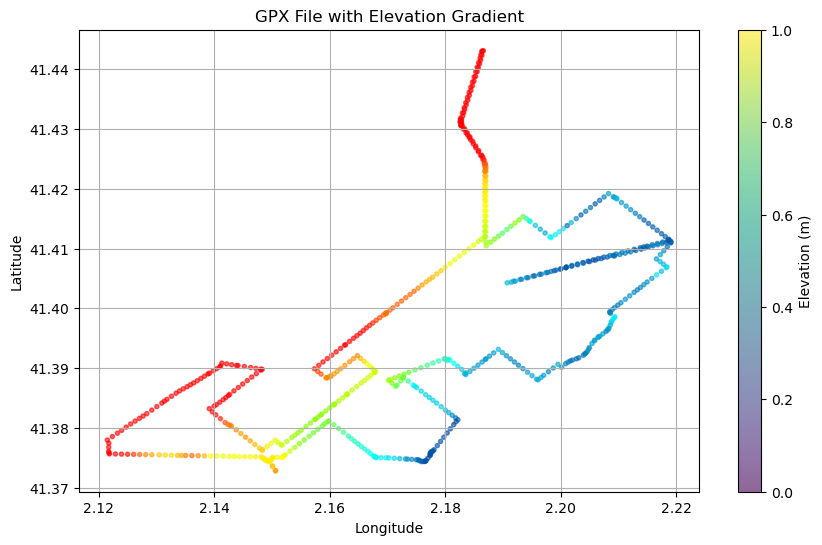

In [223]:
#import des librairies

import gpxpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import folium
from IPython.display import display, HTML
from branca.colormap import LinearColormap
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler


# Données officielles sur l'élévation du Marathon de Barcelone en mètres
min_elevation = 1  # mètre
max_elevation = 34  # mètres

# Charger le fichier GPX
gpx_file = open("marathon-de-barcelone.gpx", "r")
gpx = gpxpy.parse(gpx_file)

# Extraire les données de latitude, longitude et élévation
latitudes = [point.latitude for track in gpx.tracks for segment in track.segments for point in segment.points]
longitudes = [point.longitude for track in gpx.tracks for segment in track.segments for point in segment.points]
elevations = [point.elevation for track in gpx.tracks for segment in track.segments for point in segment.points]

# Créer une colormap personnalisée pour la colorisation en fonction de l'altitude
colors = [(0, 0, 0.5), (0, 1, 1), (0.5, 1, 0), (1, 1, 0), (1, 0, 0)]
cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=100)

# Calculer la couleur en fonction de l'altitude
elevation_normalized = [(elevation - min_elevation) / (max_elevation - min_elevation) for elevation in elevations]
colors = [cmap(elevation) for elevation in elevation_normalized]

# Afficher la carte
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=colors, marker='.', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GPX File with Elevation Gradient')
plt.colorbar(label='Elevation (m)')
plt.grid(True)
plt.show()



In [224]:
# Calcul du dénivelé total du parcours
total_elevation_gain = sum(segment.get_uphill_downhill()[0] for track in gpx.tracks for segment in track.segments)  

# Calcul de l'altitude maximale et minimale atteinte pendant le parcours
max_elevation = max(elevations)
min_elevation = min(elevations)

# Calcul de la pente maximale entre deux points successifs du parcours
max_slope = max(abs((elevations[i + 1] - elevations[i]) / (gpx.tracks[0].segments[0].points[i + 1].distance_3d(gpx.tracks[0].segments[0].points[i]))) * 100 for i in range(len(elevations) - 1))

# Calcul de la pente moyenne du parcours
mean_slope = np.mean([(elevations[i + 1] - elevations[i]) / (gpx.tracks[0].segments[0].points[i + 1].distance_3d(gpx.tracks[0].segments[0].points[i])) * 100 for i in range(len(elevations) - 1)])

# Affichage des statistiques
print("Dénivelé total du parcours:", total_elevation_gain, "mètres")
print("Altitude maximale atteinte pendant le parcours:", max_elevation, "mètres")
print("Altitude minimale atteinte pendant le parcours:", min_elevation, "mètres")
print("Pente maximale entre deux points successifs du parcours:", round(max_slope, 2), "%")
print("Pente moyenne du parcours:", round(mean_slope, 2), "%")


Dénivelé total du parcours: 147.00200000000007 mètres
Altitude maximale atteinte pendant le parcours: 54.13 mètres
Altitude minimale atteinte pendant le parcours: 3.43 mètres
Pente maximale entre deux points successifs du parcours: 5.41 %
Pente moyenne du parcours: -0.0 %


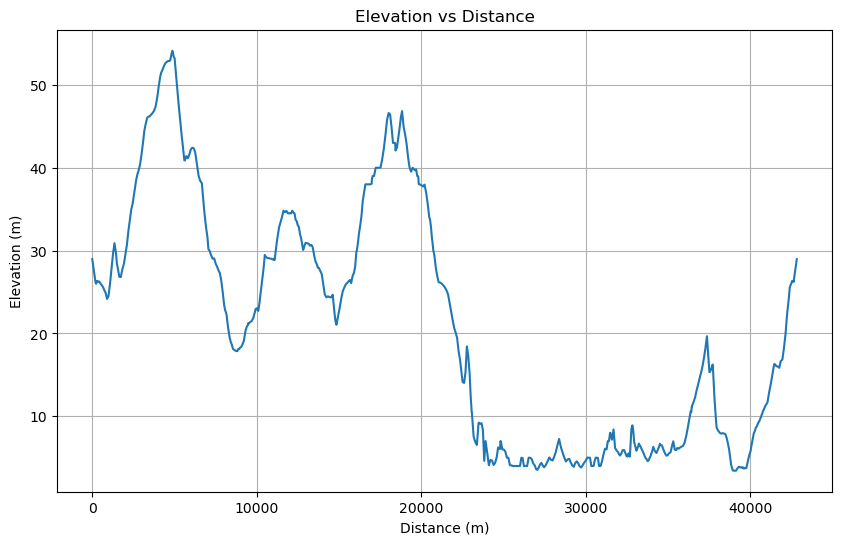

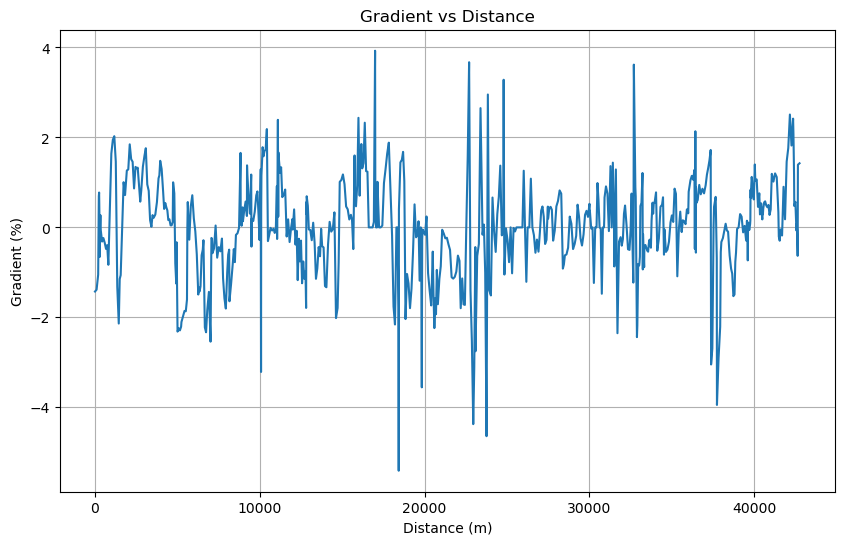

In [225]:
# Calculer la distance totale parcourue à chaque point
distances = [0]
for i in range(len(gpx.tracks[0].segments[0].points) - 1):
    distances.append(distances[i] + gpx.tracks[0].segments[0].points[i].distance_3d(gpx.tracks[0].segments[0].points[i + 1]))

# Créer un graphique linéaire de l'élévation en fonction de la distance
plt.figure(figsize=(10, 6))
plt.plot(distances, elevations)
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')
plt.title('Elevation vs Distance')
plt.grid(True)
plt.show()

# Calculer le gradient entre chaque paire de points successifs
gradients = [(elevations[i + 1] - elevations[i]) / (gpx.tracks[0].segments[0].points[i + 1].distance_3d(gpx.tracks[0].segments[0].points[i])) * 100 for i in range(len(elevations) - 1)]

# Créer un graphique linéaire du gradient en fonction de la distance
plt.figure(figsize=(10, 6))
plt.plot(distances[:-1], gradients)
plt.xlabel('Distance (m)')
plt.ylabel('Gradient (%)')
plt.title('Gradient vs Distance')
plt.grid(True)
plt.show()

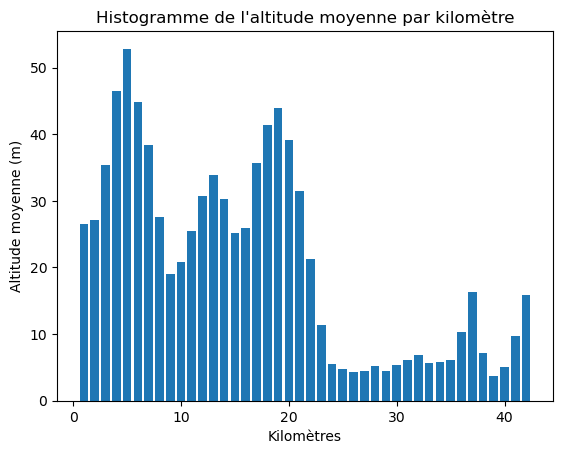

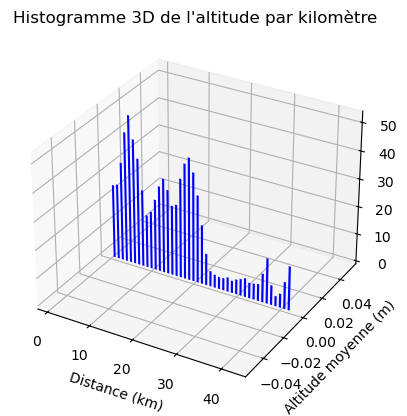

In [226]:
# données d'altitude moyenne pour chaque kilomètre
altitudes = [26.47, 27.06, 35.32, 46.51, 52.84, 44.84, 38.45, 27.58, 19.04, 20.78, 25.54, 30.77, 33.87, 30.33, 25.15, 25.95, 35.66, 41.38, 43.90, 39.12, 31.48, 21.29, 11.42, 5.56, 4.73, 4.34, 4.41, 5.20, 4.41, 5.37, 6.04, 6.82, 5.59, 5.82, 6.14, 10.38, 16.37, 7.14, 3.71, 5.02, 9.74, 15.86]

# création de l'histogramme
plt.bar(range(1, len(altitudes)+1), altitudes)
plt.xlabel('Kilomètres')
plt.ylabel('Altitude moyenne (m)')
plt.title('Histogramme de l\'altitude moyenne par kilomètre')
plt.show()

# Créer un histogramme 3D de l'altitude en fonction de la distance
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar(range(1, len(altitudes)+1), altitudes, zs=0, zdir='y', width=0.5, color='b')

ax.set_xlabel("Distance (km)")
ax.set_ylabel("Altitude moyenne (m)")
ax.set_zlabel("Fréquence")
ax.set_title("Histogramme 3D de l'altitude par kilomètre")

plt.show()



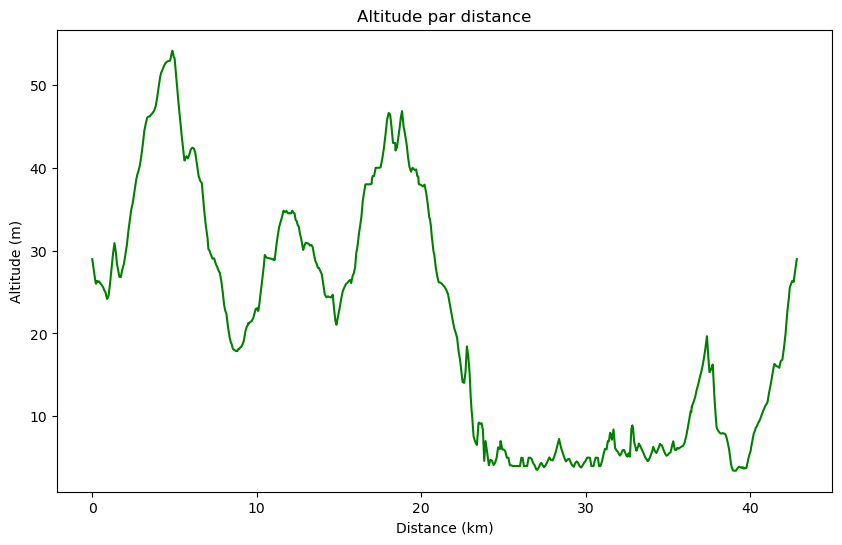

In [227]:
# Ajouter les points avec colorisation en fonction de l'altitude
for lat, lon, elevation in zip(latitudes, longitudes, elevations):
    color = colormap(elevation)
    folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(barcelona_map)

# Ajouter la légende
colormap.caption = 'Elevation (m)'
barcelona_map.add_child(colormap)

# Convertir la carte en HTML
map_html = barcelona_map._repr_html_()

# Calculer la distance cumulée le long du parcours
distances = np.zeros(len(latitudes))
for i in range(1, len(latitudes)):
    distances[i] = distances[i-1] + gpxpy.geo.haversine_distance(latitudes[i-1], longitudes[i-1], latitudes[i], longitudes[i]) / 1000

# Créer un graphique montrant l'altitude en fonction de la distance
plt.figure(figsize=(10, 6))
plt.plot(distances, elevations, color='green')
plt.xlabel('Distance (km)')
plt.ylabel('Altitude (m)')
plt.title('Altitude par distance')

# Afficher la carte et le graphique côte à côte
display(HTML(f'<div style="display:flex">{map_html}<div>{plt.gcf().canvas}</div></div>'))
plt.show()


In [230]:
# Ajouter une ligne continue pour représenter le parcours
points = list(zip(latitudes, longitudes))
folium.PolyLine(points, color='black', weight=3).add_to(barcelona_map)

# Calculer la distance cumulée le long du parcours
distances = np.zeros(len(latitudes))
distances[0] = 0
for i in range(1, len(latitudes)):
    distance = gpxpy.geo.haversine_distance(latitudes[i-1], longitudes[i-1], latitudes[i], longitudes[i]) / 1000
    distances[i] = distances[i-1] + distance



# Trouver les indices des points les plus proches des distances cumulées en kilomètres entiers
km_indices = [np.argmin(np.abs(distances - km)) for km in range(1, int(np.max(distances))+1)]

# Créer des marqueurs SVG personnalisés avec numéro de kilomètre à l'intérieur
svg_template = '''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 40 40" width="40" height="40">
  <circle cx="20" cy="20" r="18" stroke-width="2" stroke="black" fill="white" />
  <text x="50%" y="50%" dominant-baseline="central" text-anchor="middle" font-family="sans-serif" font-size="14" font-weight="bold">{}</text>
</svg>
'''

# Ajouter les marqueurs de kilomètre avec numéro à l'intérieur
for i, index in enumerate(km_indices):
    svg = svg_template.format(i+1)
    folium.Marker(location=[latitudes[index], longitudes[index]],
                  icon=folium.DivIcon(html=svg, icon_size=(40, 40)),
                  tooltip=f'KM {i+1}').add_to(barcelona_map)

# Ajouter une légende pour la colormap
legend_values = np.linspace(min_elevation, max_elevation, 5)
legend_colors = [colormap(value) for value in legend_values]
legend_labels = [f"{value:.0f}m" for value in legend_values]
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; border-radius: 5px;">
  <h4 style="margin: 0px;">Altitude</h4>
  <div style="display: flex; justify-content: space-between; align-items: center;">
"""
for i in range(len(legend_values)):
    legend_html += f"""
    <div style="width: 20px; height: 20px; background-color: {legend_colors[i]}; margin-right: 5px;"></div>
    <div>{legend_labels[i]}</div>
    """
legend_html += """
  </div>
</div>
"""
barcelona_map.get_root().html.add_child(folium.Element(legend_html))

# Ajouter un marqueur pour l'arrivée avec info window
arrivee_lat, arrivee_lon = latitudes[-1], longitudes[-1]
arrivee_info = f"Arrivée<br>Altitude: {max_elevation}m<br>Dénivelé total: {total_elevation_gain}m<br>Altitude minimale: {min_elevation}m<br>Pente maximale: {round(max_slope, 2)}%<br>Pente moyenne: {round(mean_slope, 2)}%"
folium.Marker([arrivee_lat, arrivee_lon], icon=folium.Icon(color="red"), popup=arrivee_info).add_to(barcelona_map)




# Convertir la carte en HTML
map_html = barcelona_map._repr_html_()

# Afficher la carte
display(HTML(map_html))
